<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Fit fall time and rise time of pulse using OFnonlin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qetpy import OFnonlin # Import OFnonlin from QETpy

Load saved trace and psd from demos/fitting/

In [2]:
psd = np.load('psd.npy')
pulse = np.load('trace.npy')

Visualize the pulse

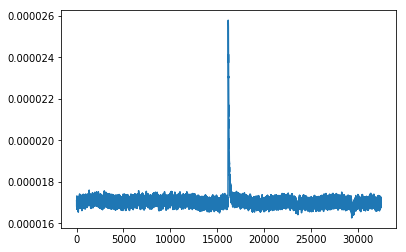

In [4]:
plt.plot(pulse)

Fit the rise and fall time using OFnonlin

In [7]:
OFnonlin?

In [8]:
OFnonlin.fit_falltimes?

 Use the parameter
 
 ```lgcplot = True```
 
 to plot the fit in frequency domain and time domain

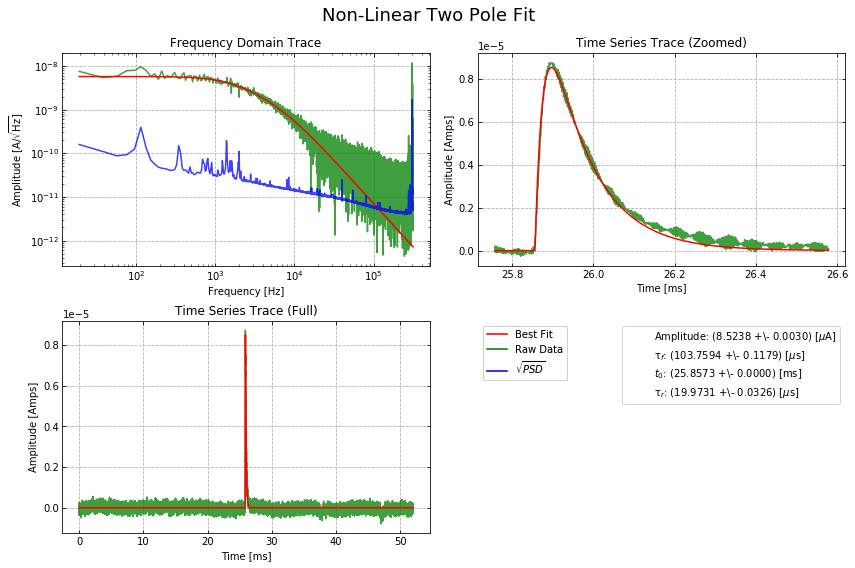

In [6]:
nonlinof = OFnonlin(psd = psd, fs = 625e3, template=None)
params, error, _, chi2 = nonlinof.fit_falltimes(pulse, lgcdouble = True, taurise = 20e-6,
                                                  lgcfullrtn = True, lgcplot = True)